<a href="https://colab.research.google.com/github/min02yam/wether/blob/main/ASOS%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASOS_기온

In [1]:
suppressPackageStartupMessages({
  require(dplyr)
  require(magrittr)
  require(stringr)
  require(data.table)
})

In [2]:
install.packages(c("DataExplorer", "sqldf", "pacman"))
#pacman::p_load("DataExplorer", "sqldf")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘htmlwidgets’, ‘igraph’, ‘plogr’, ‘reshape2’, ‘gridExtra’, ‘networkD3’, ‘gsubfn’, ‘proto’, ‘RSQLite’, ‘chron’




In [13]:
#as.data.frame(installed.packages()) %>% 
#  filter(grepl("^sql", Package))

Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,MD5sum,NeedsCompilation,Built
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


# 패키지 및 데이터 로드

In [3]:
system("gdown --id 1f-pqUZfDa9zTIa8aTmS9LdKuPuJKdIaq") # 기온
system("gdown --id 1mjGQ4CQhJ0fOeI6xJctUNAcpqp3dNMXy") # 기압 
system("gdown --id 1COhiDKZd4vAhUk58C6tStfo0SttL70Po") # 상대습도
system("gdown --id 1UTHsx-khvHGjiR7S2AjQ7X_eH7kMIBbH") # 구름
system("gdown --id 1BRG3_t6fr7O9SG1EST5Qeu_uPnA7h7ya") # 안개
system("gdown --id 1jPJW-vaUbc1NTgnWKHRujyyulFiiP19t") # 일조 
system("gdown --id 11xsQ2gbdku3SjwVNbJMUviulk8qasvge") # 적설 
system("gdown --id 1lu2nuvDgf2yjPdweXTKdy02GqZXZUpQp") # 증기압
system("gdown --id 1GdvlBPW8fl8EWkzFigvzx7QrKJnFxsBi") # 증발량 
system("gdown --id 1uZAZd9KcLU9LvId87328SBDK1h_YpSrm") # 초상온도
system("gdown --id 1fKuuq6NjT3hs4LP0KjJcndxxNwrBPMgc") # 지면온도
system("gdown --id 1FNGHOXDj-ZvULH9MLeC-78IPF9wppWKS") # 바람
system("gdown --id 1bEpTD5r8HEBenw8ywCLUe-P8LZSY-yg7") # 강수
system("gdown --id 1C--yFaAMBZWQ-VPrBOZFJms8DphBlCIu") # 관측지점

In [4]:
기상관측지점= fread("종관기상관측_ASOS_지점.csv")
기온= fread("ASOS_기온.csv")
기압= fread("ASOS_기압.csv")
구름 = fread("ASOS_구름.csv")
상대습도 = fread("ASOS_상대습도.csv")
안개 = fread("ASOS_안개.csv")
일조= fread("ASOS_일조.csv")
적설 = fread("ASOS_적설.csv")
증기압 = fread("ASOS_증기압.csv")
증발량 = fread("ASOS_증발량.csv")
초상온도 = fread("ASOS_초상온도.csv")
지면온도 =  fread("ASOS_지면온도.csv")
바람 = fread("ASOS_바람.csv")
강수 = fread("ASOS_강수.csv")

# 변수명 변경

In [5]:
#기온
nchar = nchar("db_sfc_ta_dd.")
names(기온)= str_sub(names(기온),nchar+1)

In [6]:
#기압
nchar = nchar("db_sfc_prsr_dd.")
names(기압)= str_sub(names(기압),nchar+1)

In [7]:
#colnames(상대습도)
names(상대습도)= str_sub(names(상대습도),nchar("db_sfc_rhm_dd.")+1)

In [8]:
#colnames(구름)
names(구름)= str_sub(names(구름),nchar("db_sfc_cloud_dd.")+1)

In [9]:
#colnames(안개) 
names(안개)= str_sub(names(안개),nchar("db_sfc_fog_dd.")+1)

In [10]:
# colnames(일조) db_sfc_icsr_ss_dd.
names(일조)= str_sub(names(일조),nchar("db_sfc_icsr_ss_dd.")+1)

In [11]:
#colnames(적설)
names(적설)= str_sub(names(적설),nchar("db_sfc_dsnw_dd.")+1)

In [12]:
#colnames(증기압) 
names(증기압)= str_sub(names(증기압),nchar("db_sfc_pv_dd.")+1)

In [13]:
#colnames(증발량) 
names(증발량)= str_sub(names(증발량),nchar("db_sfc_ev_dd.")+1)

In [14]:
#colnames(초상온도) db_sfc_lwt_tg_dd.
names(초상온도)= str_sub(names(초상온도),nchar("db_sfc_lwt_tg_dd.")+1)

In [15]:
#지면온도
names(지면온도)

[1] "tma"    "stn_id" "avg_ts" "max_ts" "min_ts"

In [16]:
#names(바람)  
names(바람)= str_sub(names(바람),nchar("db_sfc_wind_dd.")+1)

In [17]:
#names(강수) db_sfc_rn_dd.
names(강수)= str_sub(names(강수),nchar("db_sfc_rn_dd.")+1)

In [18]:
names(기상관측지점)

[1] "지점번호"        "경도(degree)"    "위도(degree)"    "노장해발고도(m)"
[5] "지점명(한글)"    "예보구역코드"    "법정동코드"

In [19]:
# 확인
ls()

[1] "nchar"        "강수"         "구름"         "기상관측지점" "기압"        
 [6] "기온"         "바람"         "상대습도"     "안개"         "일조"        
[11] "적설"         "증기압"       "증발량"       "지면온도"     "초상온도"

# 변수 추출
1. `기온(ta)` - 시각(PK), 지점번호(PK), 평균기온, 최고기온, 최저기온
2. `기압` - 시각(PK), 지점번호(PK), 평균현지기압(PA), 최대현지기압, 최소현지기압 , 평균해면기압(PS), 최대해면기압, 최소해면기압
3. `상대습도(rhm)`- 평균상대습도, ~~최대상대습도~~, 최소상대습도
4. ~~`구름` - 평균 중하층운량(avg_lmac), 평균 전운량(avg_tca)(목측),최저 운고(min_ch), 최다 운량(max_ca)~~
5. ~~`안개`~~
6. `일조` - 합계 일조 시간(sum_ss_hr), 일조율(ssrate)
7. ~~`적설` - 일 최심적설(dd_mes), 일 최심신적설(dd_mefs)~~ **2016까지 다시 받아야함**
8. `증기압(pv)` - 평균 증기압, 최대 증기압, 최저 증기압
9. `증발량` - 합계 소형 증발량 (sum_sml_ev), 합계 대향 증발량 (sum_lrg_ev)
10. `초상온도(tg)` - 최저 초상온도(min_tg),   평균 최저 초상온도(avg_min_tg) 
11. `지면온도(ts)` - 평균지면온도, 최대지면온도, 최소지면온도
12. `바람` - 평균 풍속(avg_ws)
최대 풍속(max_ws)
최대 풍속 풍향(max_ws_wd)
최대 순간 풍속(max_ins_ws)

13. `강수(rn)` - 합계 강수량(sum_rn), 합계 강수 계속시간(sum_rn_dur), 일 강수량(dd_rn)




In [20]:
기온 %<>% select( tma,stn_id,avg_ta,max_ta,min_ta ) 

In [21]:
기압 %<>% select( tma, stn_id, avg_pa, max_pa, min_pa, avg_ps, max_ps, min_ps)

In [22]:
상대습도 %<>% select(tma, stn_id, avg_rhm, min_rhm) 

In [72]:
#구름 %<>% select(tma, stn_id,avg_lmac,avg_tca, min_ch, max_ca )

In [23]:
#일조 %<>% select(tma, stn_id, sum_ss_hr, ssrate, sum_gsr)
#plot_missing(일조)
일조 %<>% select(tma, stn_id, sum_ss_hr, ssrate)

In [24]:
#증기압
증기압 %<>% select (tma, stn_id, avg_pv, max_pv, min_pv)

In [25]:
#증발량
증발량 %<>% select (tma, stn_id,sum_sml_ev,sum_lrg_ev )

In [26]:
#초상온도
초상온도 %<>% select( tma, stn_id, min_tg,  avg_min_tg )

In [ ]:
# 지면온도는 추출해서 가져옴

In [28]:
#바람
바람 %<>% select(tma, stn_id, avg_ws,max_ws, max_ws_wd, max_ins_ws)

In [30]:
#강수
강수 %<>% select(tma, stn_id, sum_rn, sum_rn_dur, dd_rn)

In [32]:
ㅓ

ERROR: ignored

## ts - ex. 적설

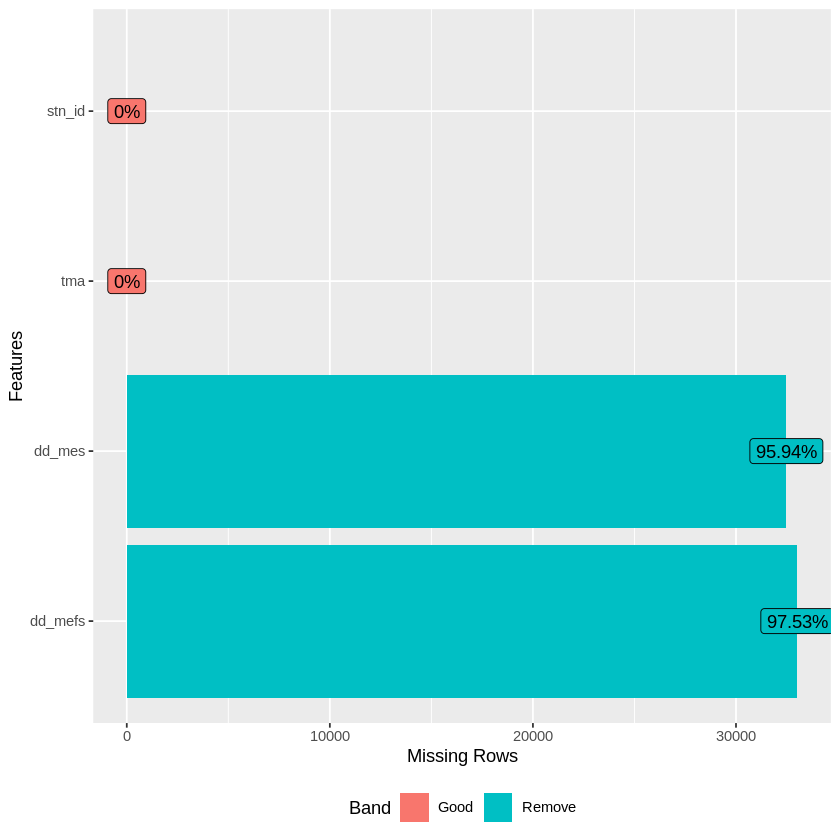

In [94]:
#적설
#적설 %<>% select(tma, stn_id,dd_mes,dd_mefs)
plot_missing(적설)

In [96]:
#install.packages("imputeTS")
library(imputeTS)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [138]:
적설 %>% filter( stn_id == 101)

tma,stn_id,dd_mes,dd_mefs
<dttm>,<int>,<dbl>,<dbl>
2012-01-01,101,0.3,0.3
2012-01-02,101,0.3,NA
2012-01-04,101,NA,NA
2012-01-06,101,NA,NA
2012-01-08,101,NA,NA
2012-01-11,101,NA,NA
2012-01-15,101,NA,NA
2012-01-17,101,NA,NA
2012-01-19,101,NA,NA


In [121]:
ts_적설=ts(적설, frequency=1) 

In [124]:
ts_적설 %>% head()

,tma,stn_id,dd_mes,dd_mefs
1,1325376000,90,1.6,NA
2,1325376000,98,NA,NA
3,1325376000,101,0.3,0.3
4,1325376000,102,NA,NA
5,1325376000,106,NA,NA
6,1325376000,108,NA,NA


A Time Series:
    [1]  1.6   NA  0.3   NA   NA   NA   NA   NA  3.3  2.3   NA   NA   NA   NA
   [15]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA  1.1
   [29]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
   [43]   NA   NA   NA  1.0   NA   NA 22.8  0.3   NA  0.2  8.0   NA   NA   NA
   [57]  0.8  0.5  3.3  1.7   NA   NA  0.2   NA   NA   NA   NA   NA   NA   NA
   [71]   NA   NA   NA   NA   NA  1.0   NA   NA   NA   NA   NA   NA   NA   NA
   [85]   NA   NA   NA   NA  0.2   NA   NA   NA  0.1   NA   NA   NA   NA   NA
   [99] 23.0  7.0   NA   NA 18.6   NA  0.8  3.7   NA   NA   NA  2.0   NA   NA
  [113]   NA  0.1   NA   NA   NA   NA   NA   NA   NA   NA  6.9   NA   NA   NA
  [127]   NA   NA  0.5  3.2   NA   NA   NA   NA   NA   NA   NA   NA   NA  1.5
  [141]   NA   NA  1.2   NA 23.0   NA   NA  0.6  0.6 29.4  1.0   NA   NA  2.0
  [155]   NA   NA   NA   NA  2.3  0.4 16.4  4.3  0.5  0.2  1.6  0.3   NA   NA
  [169]   NA   NA  5.4   NA   NA   NA   NA  9.0   NA   NA   NA   NA  2.5   NA
  [183]   NA   NA   NA   NA   NA  1.5   NA   NA   NA   NA   NA  5.7  1.8   NA
  [197]   NA   NA   NA 34.8  0.2   NA  1.1  2.6   NA   NA  6.6   NA  3.2   NA
  [211]  1.9   NA  1.4 16.8   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [225]   NA   NA  6.8   NA   NA  1.6   NA   NA   NA   NA   NA   NA   NA   NA
  [239]   NA   NA   NA   NA 22.5   NA  1.5   NA   NA   NA   NA   NA   NA   NA
  [253]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [267]   NA  3.0   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [281]   NA   NA   NA   NA   NA   NA  1.3   NA   NA   NA   NA   NA   NA   NA
  [295]  2.0   NA   NA   NA   NA   NA   NA  2.4   NA  0.7   NA   NA   NA   NA
  [309]   NA   NA   NA   NA   NA   NA   NA   NA  1.0   NA   NA   NA   NA   NA
  [323]   NA   NA   NA   NA   NA   NA   NA   NA   NA 22.0   NA  1.2   NA   NA
  [337]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA  1.8   NA
  [351]   NA   NA   NA   NA   NA   NA   NA  2.8   NA   NA   NA   NA   NA   NA
  [365]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [379]   NA   NA  0.9   NA   NA   NA   NA 27.5   NA   NA   NA  0.4   NA   NA
  [393]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [407]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [421]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [435]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [449]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [463]   NA   NA   NA   NA   NA   NA   NA   NA   NA  0.3   NA   NA   NA   NA
  [477]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [491]   NA   NA   NA   NA   NA   NA  0.2   NA   NA   NA   NA   NA   NA   NA
  [505]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA  0.1  0.9
  [519] 34.5   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [533]   NA   NA   NA   NA   NA   NA   NA  0.0   NA   NA   NA   NA   NA   NA
  [547]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA  3.5
  [561]   NA  0.9 25.2   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [575]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [589]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [603]   NA   NA   NA   NA 21.3   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [617]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [631]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [645]   NA   NA   NA   NA   NA   NA   NA   NA 21.0   NA   NA   NA   NA   NA
  [659]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [673]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [687]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [701]   NA   NA   NA   NA 25.0   NA   NA   NA   NA   NA   NA   NA   NA   NA
  [715]

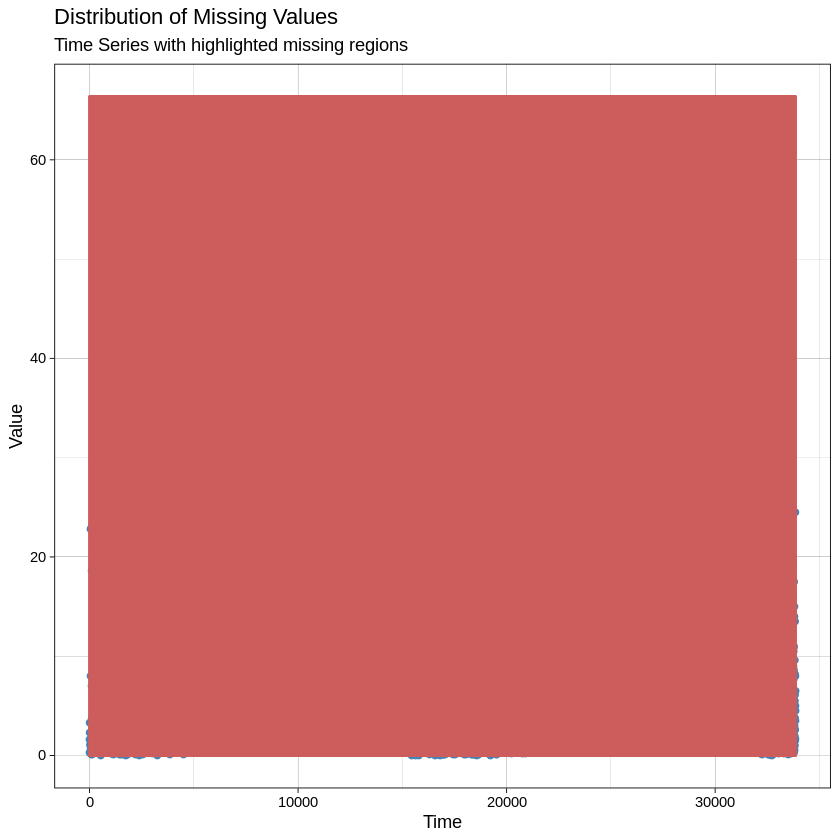

In [132]:
ggplot_na_distribution(ts_적설[,3])

# 결측치 확인

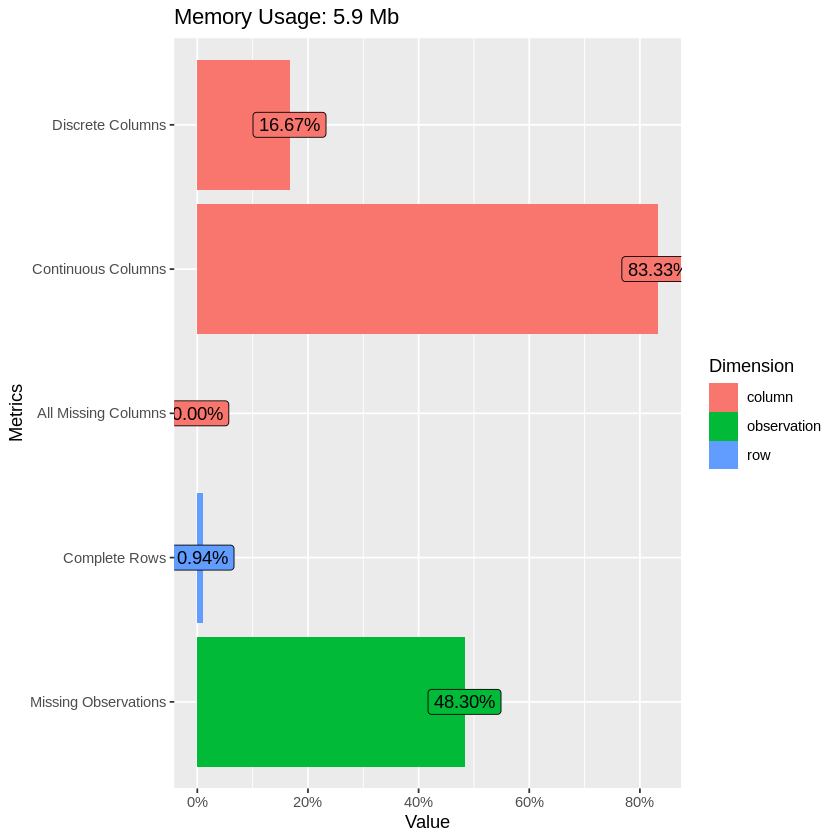

In [75]:
plot_intro(구름)

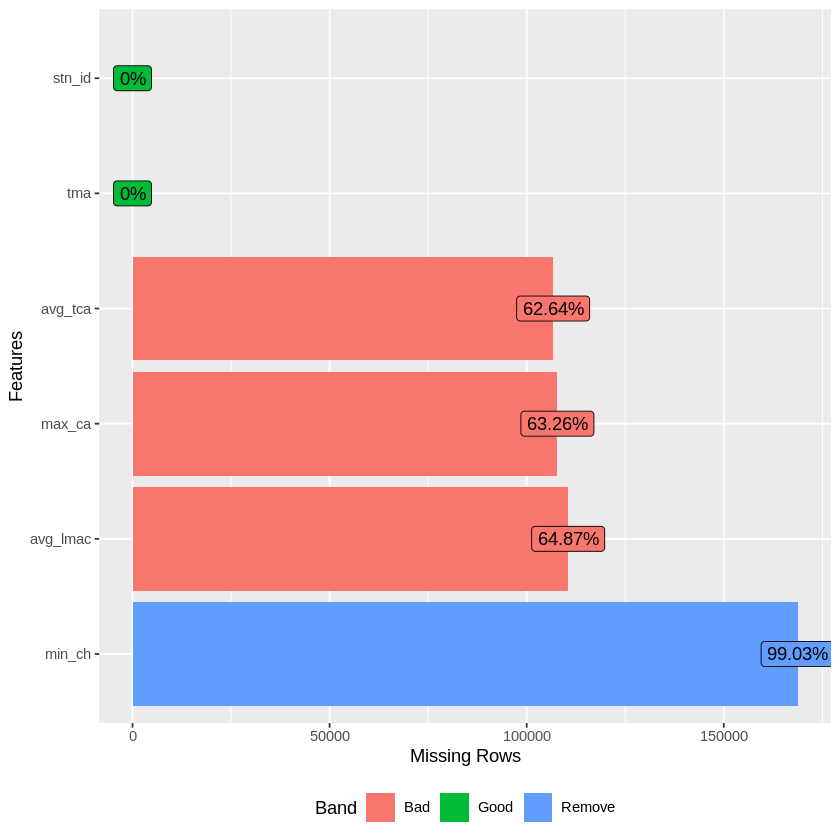

In [74]:
plot_missing(구름)

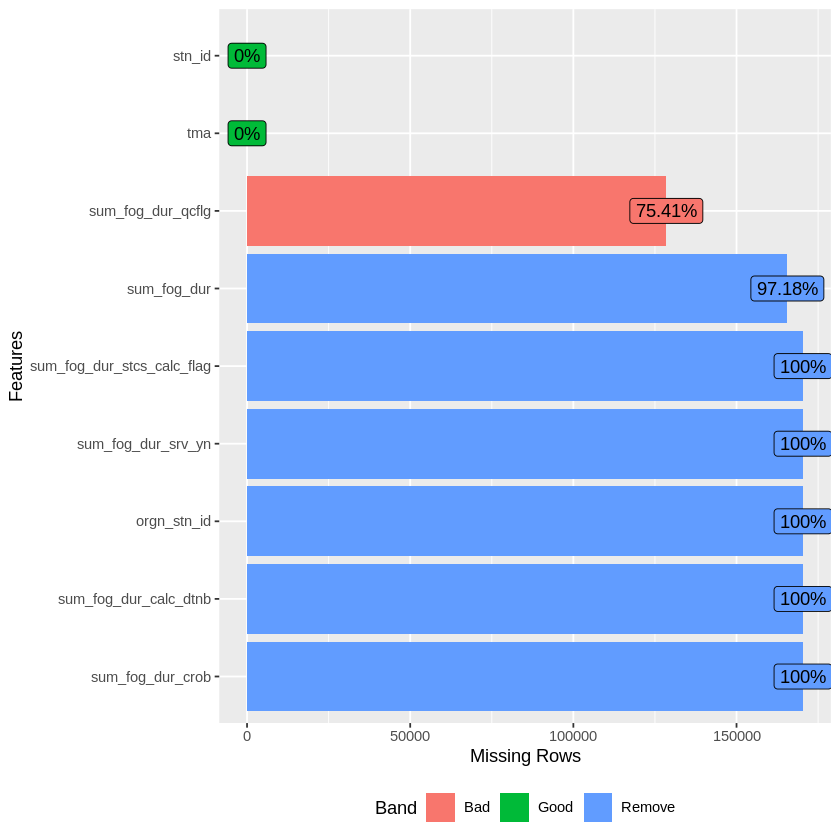

In [84]:
plot_missing(안개)

- `구름` -> DB_SFC_NMYR_CLOUD_DD ( 구름) 추출
- `안개` -> DB_SFC_RHM_DD_COMP (안개 계속시간, fog_dur)
- `상대습도` -> DB_AWS_RHM_TIM 상대습도 (최대있음) 
- `일조` -> DB_AWS_ICSR_SS_DD: DB:AWS:일사:일조:일

In [68]:
names(상대습도)

[1] "tma"     "stn_id"  "avg_rhm" "min_rhm"

In [17]:
sqldf("select * from 기압 limit 5")

db_sfc_prsr_dd.tma,db_sfc_prsr_dd.stn_id,db_sfc_prsr_dd.avg_pa,db_sfc_prsr_dd.avg_pa_qcflg,db_sfc_prsr_dd.avg_pa_crob,db_sfc_prsr_dd.max_pa,db_sfc_prsr_dd.max_pa_qcflg,db_sfc_prsr_dd.max_pa_crob,db_sfc_prsr_dd.max_pa_hrmt,db_sfc_prsr_dd.min_pa,⋯,db_sfc_prsr_dd.max_ps_srv_yn,db_sfc_prsr_dd.max_ps_stcs_calc_flag,db_sfc_prsr_dd.min_pa_hrmt_srv_yn,db_sfc_prsr_dd.min_pa_srv_yn,db_sfc_prsr_dd.min_pa_stcs_calc_flag,db_sfc_prsr_dd.min_ps_hrmt_srv_yn,db_sfc_prsr_dd.min_ps_hrmt_stcs_calc_flag,db_sfc_prsr_dd.min_ps_srv_yn,db_sfc_prsr_dd.min_ps_stcs_calc_flag,db_sfc_prsr_dd.orgn_stn_id
<dttm>,<int>,<dbl>,<int>,<lgl>,<dbl>,<int>,<dbl>,<int>,<dbl>,⋯,<lgl>,<int>,<lgl>,<lgl>,<int>,<lgl>,<lgl>,<lgl>,<int>,<lgl>
2012-01-01,95,1005.3,NA,NA,1007.2,NA,NA,2118,1002.3,⋯,NA,4,NA,NA,4,NA,NA,NA,4,NA
2012-01-01,98,1010.6,NA,NA,1012.7,NA,NA,2040,1007.6,⋯,NA,4,NA,NA,4,NA,NA,NA,4,NA
2012-01-01,100,927.5,NA,NA,929.3,NA,NA,1,924.8,⋯,NA,4,NA,NA,4,NA,NA,NA,4,NA
2012-01-01,112,1016.4,NA,NA,1018.5,NA,NA,1953,1014.2,⋯,NA,4,NA,NA,4,NA,NA,NA,4,NA
2012-01-01,114,1005.2,NA,NA,1007.2,NA,NA,2316,1002.3,⋯,NA,4,NA,NA,4,NA,NA,NA,4,NA


In [23]:
기온 %>% head

tma,stn_id,avg_ta,max_ta,min_ta
<dttm>,<int>,<dbl>,<dbl>,<dbl>
2012-01-01,104,0.0,4.0,-3.5
2012-01-01,106,1.6,5.3,-1.1
2012-01-01,112,-2.3,1.3,-5.8
2012-01-01,115,1.9,4.3,-1.5
2012-01-01,121,-2.8,1.8,-7.7
2012-01-01,127,-2.8,1.7,-9.4


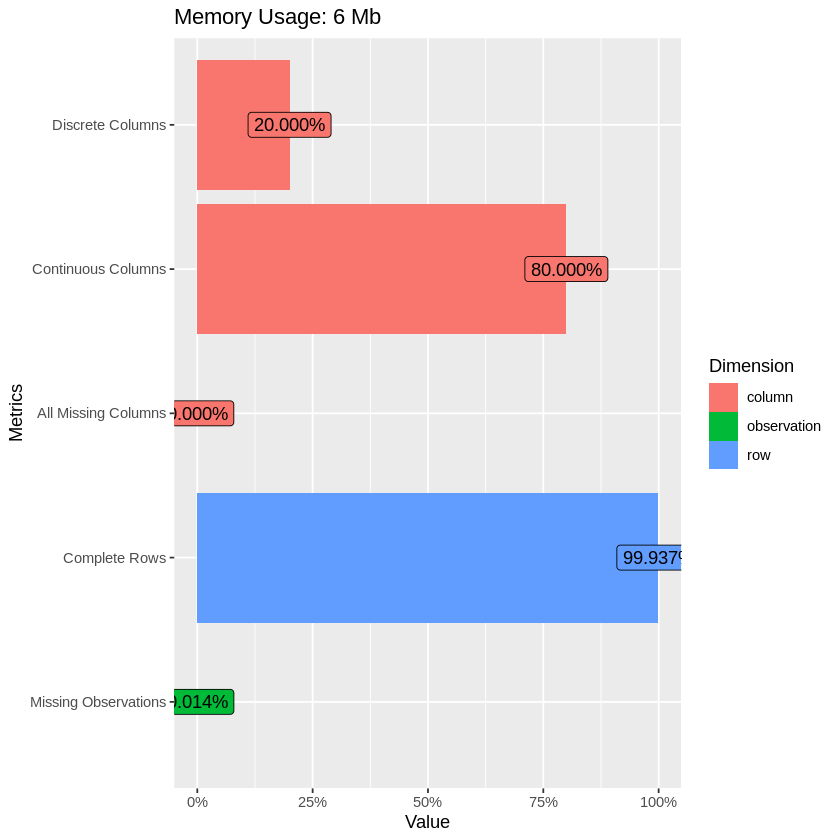

In [ ]:
plot_intro(기온) 

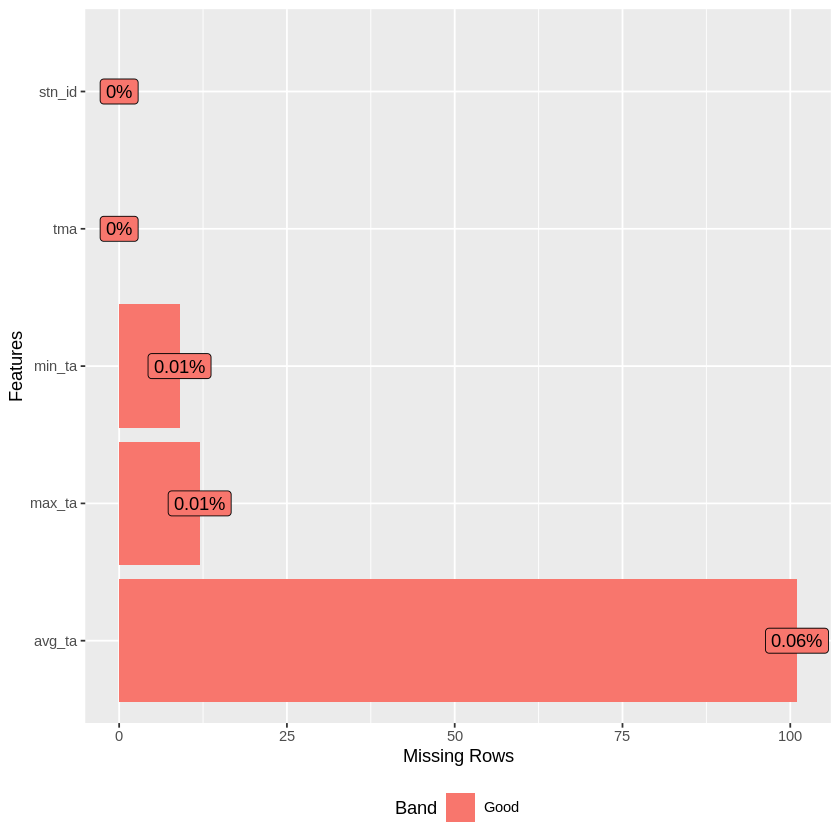

In [ ]:
plot_missing(기온)

미씽존재!!

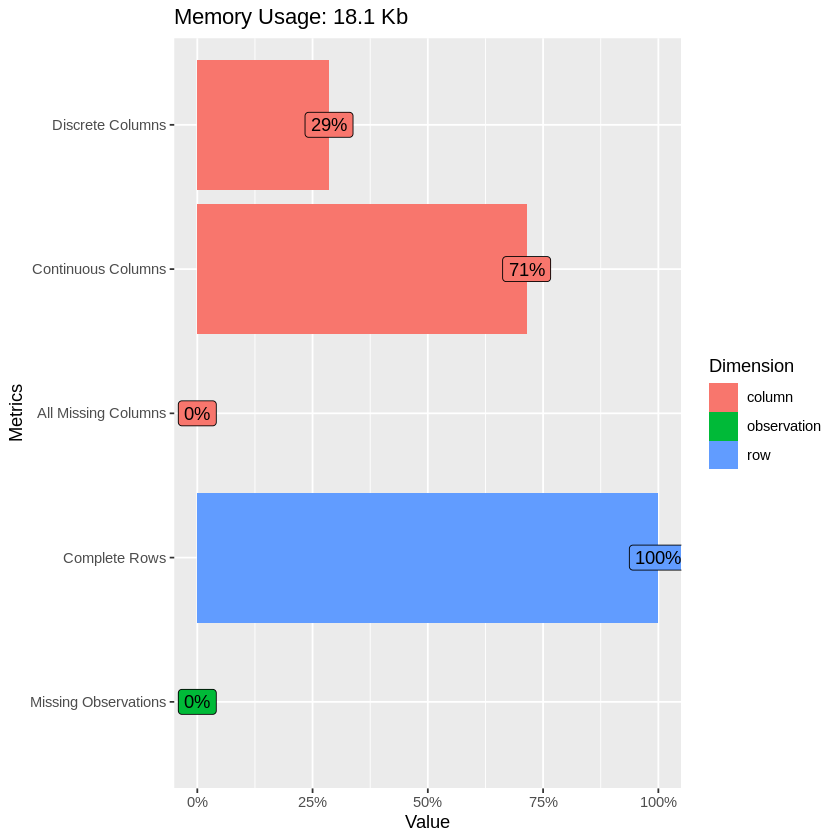

In [ ]:
plot_intro(기상관측지점)

In [ ]:
기온$stn_id  %>% table 

.
  90   93   95   98   99  100  101  102  104  105  106  108  112  114  115  119 
1827   92 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 
 121  127  129  130  131  133  135  136  137  138  140  141  143  146  152  155 
1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827    9 1827 1827 1827 1827 
 156  159  162  165  168  169  170  172  174  175  176  177  184  185  188  189 
1827 1827 1827 1827 1827 1827 1827 1827 1827 1827  619  424 1827 1827 1827 1827 
 192  201  202  203  211  212  216  217  221  226  232  235  236  238  243  244 
1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 
 245  247  248  251  252  253  254  255  256  257  258  259  260  261  262  263 
1827 1827 1827 1827 1827 1827 1827 1827  184 1827 1827 1827 1827 1827 1827 1827 
 264  266  268  271  272  273  276  277  278  279  281  283  284  285  288  289 
1827 1827  967 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 
 294  295  864 
1827 1827 

결측치 위치 보기